In [1]:
import sys
from PyQt5.QtWidgets import *
from PyQt5 import uic
from PyQt5.QtWidgets import QApplication
import pandas as pd
import matplotlib
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import datetime
import timestring
import os


In [3]:
# Header ID 설정
ID = ["Node","TransTime","Model","Z_Axis_RMS_Velocity_in_sec","Z_Axis_RMS_Velocity_mm_sec","Temperature_F","Temperature_C","X_Axis_RMS_Velocity_in_sec","X_Axis_RMS_Velocity_mm_sec","Z_Axis_Peak_Acceleration_G","X_Axis_Peak_Acceleration_G","Z_Axis_Peak_Frequency_Hz","X_Axis_Peak_Frequency_Hz","Z_Axis_RMS_Acceleration_G","X_Axis_RMS_Acceleration_G","Z_Axis_Kurtosis","X_Axis_Kurtosis","Z_Axis_Crest_Acceleration","X_Axis_Crest_Acceleration","Z_Axis_Peak_Velocity_in_sec","Z_Axis_Peak_Velocity_mm_sec","X_Axis_Peak_Velocity_in_sec","X_Axis_Peak_Velocity_mm_sec"]

#데이터 경로 설정
path_dir = "C:/Users/dwku/Desktop/Data"
file_list = os.listdir(path_dir)
file_list.sort
file_list
len(file_list)

# 데이터 파일 읽기 및 병합
for i in range(len(file_list)):
    df_buff = pd.read_csv(path_dir + "/" + file_list[i], names = ID)
    if i == 0:
        df_raw = df_buff
    else:
        df_raw = pd.concat([df_raw, df_buff])

df = df_raw

In [4]:
for i in range(len(ID)):
    # 구분자 ':' 기준으로 나누고 그 {0}과 {1} 요소 중 {1} 요소를 df에 저장
    df[ID[i]] = df_raw[ID[i]].str.split(":", n=1, expand=True)[1]

    # 첫 행의 '_'을 제외한 string 반환
    if i == 0:
        df[ID[i]] = df[ID[i]].str.split("_", n=1, expand=True)[0]

    # 제일 마지막 행에 표기 된 '}'을 제외한 string 반환
    elif i == (len(ID) - 1):
        df[ID[i]] = df[ID[i]].str.split("}", n=1, expand=True)[0]
    else:
        pass

# # String to Float Transformation
for i in range(3, len(ID)):
    df[ID[i]] = pd.to_numeric(df[ID[i]])

# series_list = [[0 for cols in range(len(df))] for rows in range(1)]

series_list = list(range(len(df)))
df["Time_Series"] = series_list
print(df.head())

Z_Axis_RMS_Velocity_mm_sec_op = df[df["Z_Axis_RMS_Velocity_mm_sec"] > 0.5]

  Node                  TransTime      Model  Z_Axis_RMS_Velocity_in_sec  \
0   "2  "2017-10-20 16:26:24.174"  "QM42VT2"                      0.0123   
1   "1  "2017-10-20 16:26:19.177"  "QM42VT2"                      0.0162   
2   "3  "2017-10-20 16:26:29.167"  "QM42VT2"                      0.0106   
3   "2  "2017-10-20 16:26:39.161"  "QM42VT2"                      0.0124   
4   "1  "2017-10-20 16:26:34.164"  "QM42VT2"                      0.0173   

   Z_Axis_RMS_Velocity_mm_sec  Temperature_F  Temperature_C  \
0                       0.312         136.77          58.20   
1                       0.412         115.46          46.36   
2                       0.271         128.90          53.83   
3                       0.315         136.63          58.12   
4                       0.440         115.46          46.36   

   X_Axis_RMS_Velocity_in_sec  X_Axis_RMS_Velocity_mm_sec  \
0                      0.0104                       0.265   
1                      0.0238             

In [5]:
df.head()

,Node,TransTime,Model,Z_Axis_RMS_Velocity_in_sec,Z_Axis_RMS_Velocity_mm_sec,Temperature_F,Temperature_C,X_Axis_RMS_Velocity_in_sec,X_Axis_RMS_Velocity_mm_sec,Z_Axis_Peak_Acceleration_G,...,X_Axis_RMS_Acceleration_G,Z_Axis_Kurtosis,X_Axis_Kurtosis,Z_Axis_Crest_Acceleration,X_Axis_Crest_Acceleration,Z_Axis_Peak_Velocity_in_sec,Z_Axis_Peak_Velocity_mm_sec,X_Axis_Peak_Velocity_in_sec,X_Axis_Peak_Velocity_mm_sec,Time_Series
0,"""2","""2017-10-20 16:26:24.174""","""QM42VT2""",0.0123,0.312,136.77,58.20,0.0104,0.265,0.715,...,0.050,2.986,2.988,4.109,3.334,0.0174,0.442,0.0147,0.374,0
1,"""1","""2017-10-20 16:26:19.177""","""QM42VT2""",0.0162,0.412,115.46,46.36,0.0238,0.605,0.712,...,0.075,2.983,2.841,3.807,3.458,0.0229,0.582,0.0337,0.856,1
2,"""3","""2017-10-20 16:26:29.167""","""QM42VT2""",0.0106,0.271,128.90,53.83,0.0102,0.259,0.926,...,0.019,3.041,3.027,26.354,53.786,0.0151,0.384,0.0144,0.367,2
3,"""2","""2017-10-20 16:26:39.161""","""QM42VT2""",0.0124,0.315,136.63,58.12,0.0125,0.319,0.668,...,0.048,2.959,3.092,3.851,3.797,0.0175,0.446,0.0177,0.451,3
4,"""1","""2017-10-20 16:26:34.164""","""QM42VT2""",0.0173,0.440,115.46,46.36,0.0219,0.557,0.698,...,0.072,2.925,3.001,3.786,3.394,0.0245,0.623,0.0310,0.787,4


# 시간 변형 체크

In [6]:
# # 문자열 타입 시간 타입으로 변형
# time_df = df["TransTime"]

# for i in range(len(time_df)):
#     time_df[i] = pd.to_datetime(time_df[i].split('"')[1])
# df["TransTime_re"] = time_df

In [7]:
# for i in range(len(time_df)):
#     time_df[i] = pd.to_datetime(time_df[i].split('"')[1])
# df["TransTime_re"] = time_df

# Float type 변환

In [6]:
# # String to Float Transformation
for i in range(3, len(ID)):
    df[ID[i]] = pd.to_numeric(df[ID[i]])
    

In [7]:
series_list = [[0 for cols in range(len(df))]for rows in range(1)]

In [8]:
series_list = list(range(len(df)))
df["Series"] = series_list
df.head()

,Node,TransTime,Model,Z_Axis_RMS_Velocity_in_sec,Z_Axis_RMS_Velocity_mm_sec,Temperature_F,Temperature_C,X_Axis_RMS_Velocity_in_sec,X_Axis_RMS_Velocity_mm_sec,Z_Axis_Peak_Acceleration_G,...,Z_Axis_Kurtosis,X_Axis_Kurtosis,Z_Axis_Crest_Acceleration,X_Axis_Crest_Acceleration,Z_Axis_Peak_Velocity_in_sec,Z_Axis_Peak_Velocity_mm_sec,X_Axis_Peak_Velocity_in_sec,X_Axis_Peak_Velocity_mm_sec,Time_Series,Series
0,"""2","""2017-10-20 16:26:24.174""","""QM42VT2""",0.0123,0.312,136.77,58.20,0.0104,0.265,0.715,...,2.986,2.988,4.109,3.334,0.0174,0.442,0.0147,0.374,0,0
1,"""1","""2017-10-20 16:26:19.177""","""QM42VT2""",0.0162,0.412,115.46,46.36,0.0238,0.605,0.712,...,2.983,2.841,3.807,3.458,0.0229,0.582,0.0337,0.856,1,1
2,"""3","""2017-10-20 16:26:29.167""","""QM42VT2""",0.0106,0.271,128.90,53.83,0.0102,0.259,0.926,...,3.041,3.027,26.354,53.786,0.0151,0.384,0.0144,0.367,2,2
3,"""2","""2017-10-20 16:26:39.161""","""QM42VT2""",0.0124,0.315,136.63,58.12,0.0125,0.319,0.668,...,2.959,3.092,3.851,3.797,0.0175,0.446,0.0177,0.451,3,3
4,"""1","""2017-10-20 16:26:34.164""","""QM42VT2""",0.0173,0.440,115.46,46.36,0.0219,0.557,0.698,...,2.925,3.001,3.786,3.394,0.0245,0.623,0.0310,0.787,4,4


# 정상 불량 구분

In [9]:
normal= df[df["Z_Axis_RMS_Velocity_mm_sec"] > 0.5]


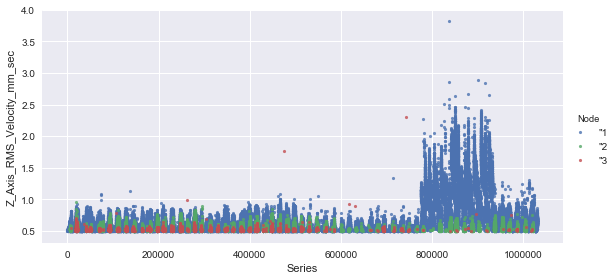

In [10]:
sns.lmplot(data=normal, x="Series", y="Z_Axis_RMS_Velocity_mm_sec", hue="Node", fit_reg=False, scatter_kws={"s": 10}, size=4, aspect=2)

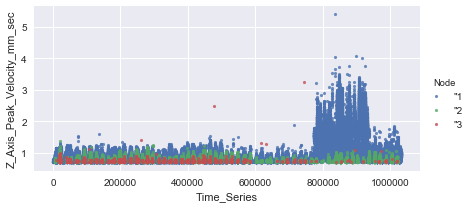

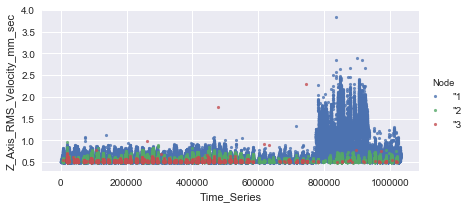

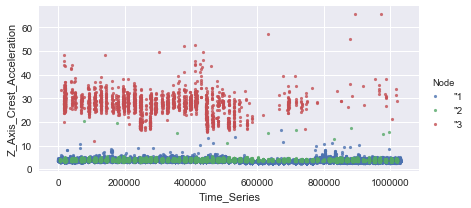

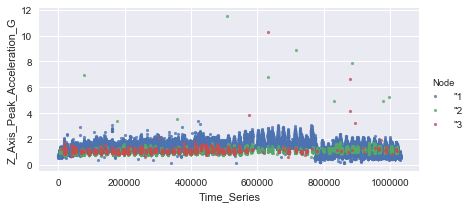

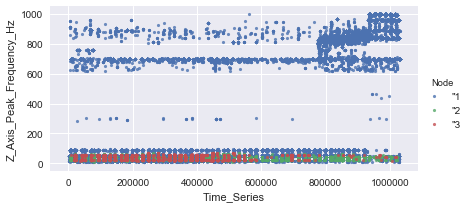

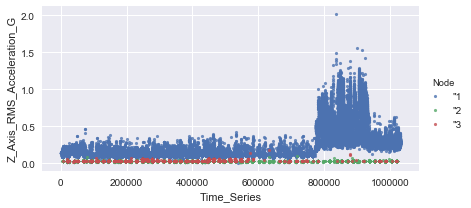

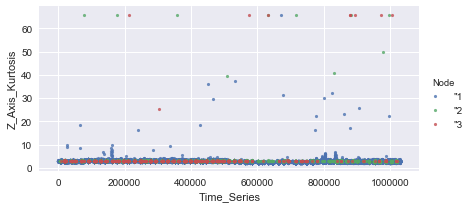

In [13]:
sns.lmplot(data=normal, x="Time_Series", y="Z_Axis_Peak_Velocity_mm_sec",hue="Node", fit_reg=False, scatter_kws={"s": 10}, size=3, aspect=2)
sns.lmplot(data=normal, x="Time_Series", y="Z_Axis_RMS_Velocity_mm_sec", hue="Node",fit_reg=False, scatter_kws={"s": 10}, size=3, aspect=2)
sns.lmplot(data=normal, x="Time_Series", y="Z_Axis_Crest_Acceleration", hue="Node",fit_reg=False, scatter_kws={"s": 10}, size=3, aspect=2)
sns.lmplot(data=normal, x="Time_Series", y="Z_Axis_Peak_Acceleration_G", hue="Node",fit_reg=False, scatter_kws={"s": 10}, size=3, aspect=2)
sns.lmplot(data=normal, x="Time_Series", y="Z_Axis_Peak_Frequency_Hz", hue="Node",fit_reg=False, scatter_kws={"s": 10}, size=3, aspect=2)
sns.lmplot(data=normal, x="Time_Series", y="Z_Axis_RMS_Acceleration_G", hue="Node",fit_reg=False, scatter_kws={"s": 10}, size=3, aspect=2)
sns.lmplot(data=normal, x="Time_Series", y="Z_Axis_Kurtosis", hue="Node",fit_reg=False, scatter_kws={"s": 10}, size=3, aspect=2)

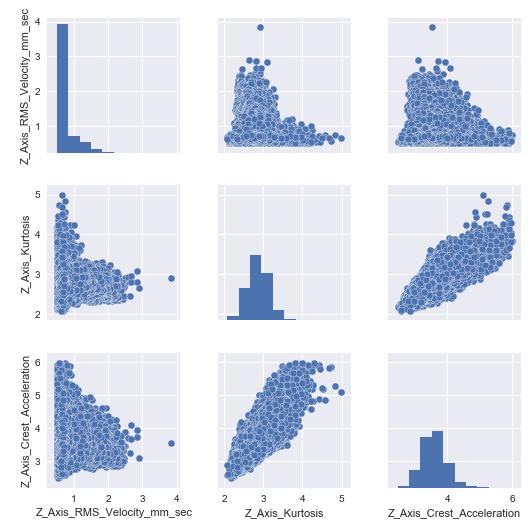

In [34]:
node1 = normal[normal["Node"]=='"1']
node2 = normal[normal["Node"]=='"2']
node3 = normal[normal["Node"]=='"3']

node1_re = node1[["Z_Axis_RMS_Velocity_mm_sec","Z_Axis_Kurtosis", "Z_Axis_Crest_Acceleration"]] 
node1_re_rm = node1_re[(node1_re.Z_Axis_Crest_Acceleration < 6 ) & (node1_re.Z_Axis_Kurtosis < 8)]
sns_plot = sns.pairplot(node1_re_rm)


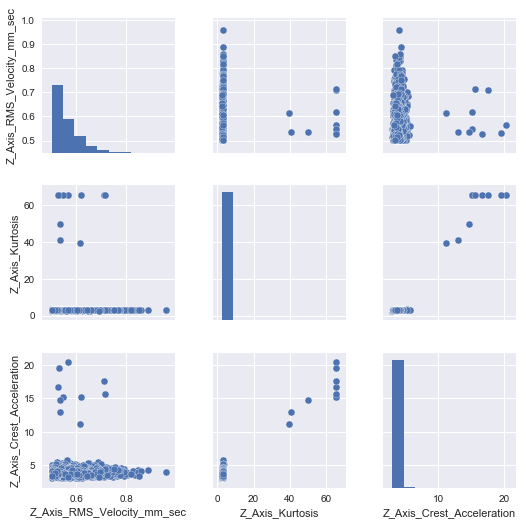

In [26]:
node2_re = node2[["Z_Axis_RMS_Velocity_mm_sec","Z_Axis_Kurtosis", "Z_Axis_Crest_Acceleration"]] 
node2_re_rm = node2_re[(node2_re.Z_Axis_Crest_Acceleration < 6 ) & (node2_re.Z_Axis_Kurtosis < 8)]
sns_plot = sns.pairplot(node2_re)

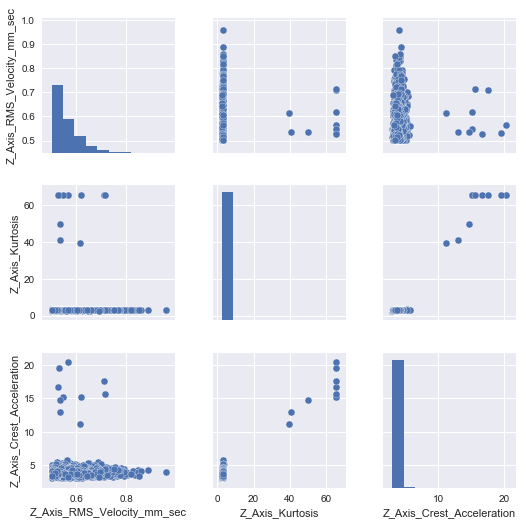

In [25]:
node3_re = node2[["Z_Axis_RMS_Velocity_mm_sec","Z_Axis_Kurtosis", "Z_Axis_Crest_Acceleration"]] 
node3_re_rm = node3_re[(node3_re.Z_Axis_Crest_Acceleration < 6 ) & (node3_re.Z_Axis_Kurtosis < 8)]
sns_plot = sns.pairplot(node3_re)

In [33]:
corr = node1_re_rm.corr(method='pearson')
corr

,Z_Axis_RMS_Velocity_mm_sec,Z_Axis_Kurtosis,Z_Axis_Crest_Acceleration
Z_Axis_RMS_Velocity_mm_sec,1.000000,-0.188525,-0.115445
Z_Axis_Kurtosis,-0.188525,1.000000,0.781549
Z_Axis_Crest_Acceleration,-0.115445,0.781549,1.000000


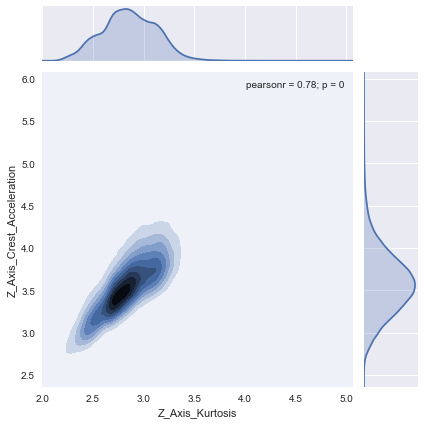

In [31]:
sns.jointplot(x="Z_Axis_Kurtosis", y="Z_Axis_Crest_Acceleration", data=node1_re_rm, kind="kde");

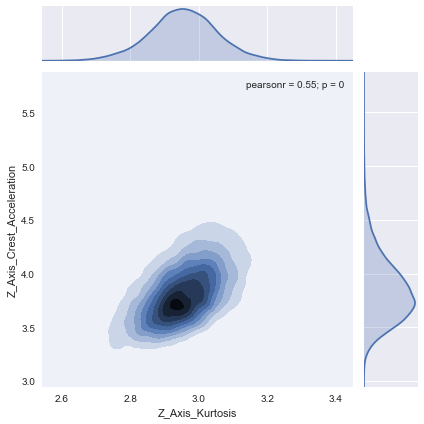

In [38]:
sns.jointplot(x="Z_Axis_Kurtosis", y="Z_Axis_Crest_Acceleration", data=node2_re_rm, kind="kde");

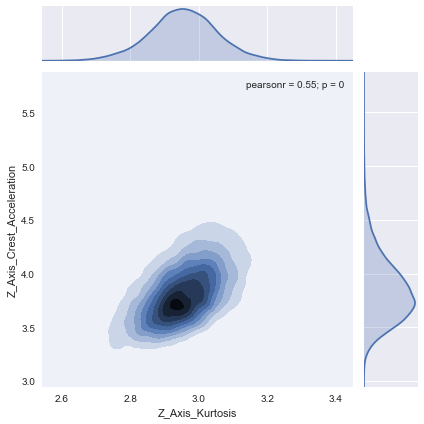

In [39]:
sns.jointplot(x="Z_Axis_Kurtosis", y="Z_Axis_Crest_Acceleration", data=node3_re_rm, kind="kde");

In [21]:
node1_op = node1[(node1.Z_Axis_RMS_Velocity_mm_sec > 0.5)]
node2_op = node2[(node2.Z_Axis_RMS_Velocity_mm_sec > 0.5)]
node3_op = node3[(node3.Z_Axis_RMS_Velocity_mm_sec > 0.5)]

In [22]:
corr1 = node1_op.corr(method='pearson')
# corr1.to_csv('C:/Users/dwku/Desktop/corr1.csv')
corr1

,Z_Axis_RMS_Velocity_in_sec,Z_Axis_RMS_Velocity_mm_sec,Temperature_F,Temperature_C,X_Axis_RMS_Velocity_in_sec,X_Axis_RMS_Velocity_mm_sec,Z_Axis_Peak_Acceleration_G,X_Axis_Peak_Acceleration_G,Z_Axis_Peak_Frequency_Hz,X_Axis_Peak_Frequency_Hz,...,Z_Axis_Kurtosis,X_Axis_Kurtosis,Z_Axis_Crest_Acceleration,X_Axis_Crest_Acceleration,Z_Axis_Peak_Velocity_in_sec,Z_Axis_Peak_Velocity_mm_sec,X_Axis_Peak_Velocity_in_sec,X_Axis_Peak_Velocity_mm_sec,Time_Series,Series
Z_Axis_RMS_Velocity_in_sec,1.000000,0.999996,-0.328307,-0.328299,-0.001244,-0.001241,-0.213423,-0.163941,0.465154,0.848280,...,-0.125897,0.072111,-0.112075,0.051303,0.999995,0.999996,-0.001244,-0.001245,0.450285,0.450285
Z_Axis_RMS_Velocity_mm_sec,0.999996,1.000000,-0.328327,-0.328320,-0.001262,-0.001259,-0.213434,-0.163956,0.465175,0.848284,...,-0.125897,0.072114,-0.112067,0.051302,0.999998,0.999999,-0.001262,-0.001263,0.450298,0.450298
Temperature_F,-0.328307,-0.328327,1.000000,1.000000,0.412308,0.412322,0.253190,0.233400,-0.618369,-0.278451,...,0.131757,-0.154290,0.100358,-0.162525,-0.328322,-0.328325,0.412319,0.412319,-0.703432,-0.703432
Temperature_C,-0.328299,-0.328320,1.000000,1.000000,0.412307,0.412320,0.253197,0.233405,-0.618367,-0.278439,...,0.131751,-0.154288,0.100351,-0.162525,-0.328315,-0.328318,0.412317,0.412317,-0.703432,-0.703432
X_Axis_RMS_Velocity_in_sec,-0.001244,-0.001262,0.412308,0.412307,1.000000,0.999995,0.320296,0.387955,-0.470022,-0.135840,...,0.159143,-0.265895,0.097551,-0.296644,-0.001259,-0.001255,0.999993,0.999995,-0.411543,-0.411543
X_Axis_RMS_Velocity_mm_sec,-0.001241,-0.001259,0.412322,0.412320,0.999995,1.000000,0.320289,0.387948,-0.470024,-0.135836,...,0.159152,-0.265881,0.097558,-0.296628,-0.001256,-0.001252,0.999997,0.999999,-0.411552,-0.411552
Z_Axis_Peak_Acceleration_G,-0.213423,-0.213434,0.253190,0.253197,0.320296,0.320289,1.000000,0.822223,-0.454696,-0.278954,...,-0.116636,-0.176830,-0.105480,-0.233063,-0.213430,-0.213428,0.320292,0.320292,-0.262273,-0.262273
X_Axis_Peak_Acceleration_G,-0.163941,-0.163956,0.233400,0.233405,0.387955,0.387948,0.822223,1.000000,-0.478626,-0.242237,...,-0.127751,-0.197361,-0.228127,-0.138389,-0.163951,-0.163952,0.387954,0.387954,-0.264240,-0.264240
Z_Axis_Peak_Frequency_Hz,0.465154,0.465175,-0.618369,-0.618367,-0.470022,-0.470024,-0.454696,-0.478626,1.000000,0.437413,...,-0.098487,0.185002,-0.051479,0.199039,0.465169,0.465170,-0.470032,-0.470027,0.641772,0.641772
X_Axis_Peak_Frequency_Hz,0.848280,0.848284,-0.278451,-0.278439,-0.135840,-0.135836,-0.278954,-0.242237,0.437413,1.000000,...,-0.090401,0.119715,-0.051357,0.122782,0.848287,0.848283,-0.135834,-0.135840,0.380028,0.380028


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


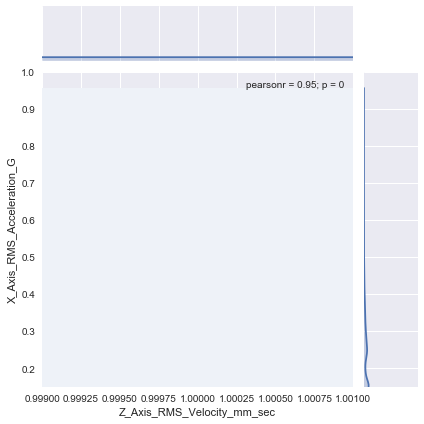

In [15]:
sns.jointplot(x="Z_Axis_RMS_Velocity_mm_sec", y="X_Axis_RMS_Acceleration_G", data=node1, kind="kde", xlim=1.0, ylim=0.15);

In [44]:
corr2 = node1_op.corr(method='pearson')
corr2

,Z_Axis_RMS_Velocity_in_sec,Z_Axis_RMS_Velocity_mm_sec,Temperature_F,Temperature_C,X_Axis_RMS_Velocity_in_sec,X_Axis_RMS_Velocity_mm_sec,Z_Axis_Peak_Acceleration_G,X_Axis_Peak_Acceleration_G,Z_Axis_Peak_Frequency_Hz,X_Axis_Peak_Frequency_Hz,...,Z_Axis_Kurtosis,X_Axis_Kurtosis,Z_Axis_Crest_Acceleration,X_Axis_Crest_Acceleration,Z_Axis_Peak_Velocity_in_sec,Z_Axis_Peak_Velocity_mm_sec,X_Axis_Peak_Velocity_in_sec,X_Axis_Peak_Velocity_mm_sec,Time_Series,Series
Z_Axis_RMS_Velocity_in_sec,1.000000,0.999996,-0.328307,-0.328299,-0.001244,-0.001241,-0.213423,-0.163941,0.465154,0.848280,...,-0.125897,0.072111,-0.112075,0.051303,0.999995,0.999996,-0.001244,-0.001245,0.450285,0.450285
Z_Axis_RMS_Velocity_mm_sec,0.999996,1.000000,-0.328327,-0.328320,-0.001262,-0.001259,-0.213434,-0.163956,0.465175,0.848284,...,-0.125897,0.072114,-0.112067,0.051302,0.999998,0.999999,-0.001262,-0.001263,0.450298,0.450298
Temperature_F,-0.328307,-0.328327,1.000000,1.000000,0.412308,0.412322,0.253190,0.233400,-0.618369,-0.278451,...,0.131757,-0.154290,0.100358,-0.162525,-0.328322,-0.328325,0.412319,0.412319,-0.703432,-0.703432
Temperature_C,-0.328299,-0.328320,1.000000,1.000000,0.412307,0.412320,0.253197,0.233405,-0.618367,-0.278439,...,0.131751,-0.154288,0.100351,-0.162525,-0.328315,-0.328318,0.412317,0.412317,-0.703432,-0.703432
X_Axis_RMS_Velocity_in_sec,-0.001244,-0.001262,0.412308,0.412307,1.000000,0.999995,0.320296,0.387955,-0.470022,-0.135840,...,0.159143,-0.265895,0.097551,-0.296644,-0.001259,-0.001255,0.999993,0.999995,-0.411543,-0.411543
X_Axis_RMS_Velocity_mm_sec,-0.001241,-0.001259,0.412322,0.412320,0.999995,1.000000,0.320289,0.387948,-0.470024,-0.135836,...,0.159152,-0.265881,0.097558,-0.296628,-0.001256,-0.001252,0.999997,0.999999,-0.411552,-0.411552
Z_Axis_Peak_Acceleration_G,-0.213423,-0.213434,0.253190,0.253197,0.320296,0.320289,1.000000,0.822223,-0.454696,-0.278954,...,-0.116636,-0.176830,-0.105480,-0.233063,-0.213430,-0.213428,0.320292,0.320292,-0.262273,-0.262273
X_Axis_Peak_Acceleration_G,-0.163941,-0.163956,0.233400,0.233405,0.387955,0.387948,0.822223,1.000000,-0.478626,-0.242237,...,-0.127751,-0.197361,-0.228127,-0.138389,-0.163951,-0.163952,0.387954,0.387954,-0.264240,-0.264240
Z_Axis_Peak_Frequency_Hz,0.465154,0.465175,-0.618369,-0.618367,-0.470022,-0.470024,-0.454696,-0.478626,1.000000,0.437413,...,-0.098487,0.185002,-0.051479,0.199039,0.465169,0.465170,-0.470032,-0.470027,0.641772,0.641772
X_Axis_Peak_Frequency_Hz,0.848280,0.848284,-0.278451,-0.278439,-0.135840,-0.135836,-0.278954,-0.242237,0.437413,1.000000,...,-0.090401,0.119715,-0.051357,0.122782,0.848287,0.848283,-0.135834,-0.135840,0.380028,0.380028


In [45]:
corr3 = node1_op.corr(method='pearson')
corr3

,Z_Axis_RMS_Velocity_in_sec,Z_Axis_RMS_Velocity_mm_sec,Temperature_F,Temperature_C,X_Axis_RMS_Velocity_in_sec,X_Axis_RMS_Velocity_mm_sec,Z_Axis_Peak_Acceleration_G,X_Axis_Peak_Acceleration_G,Z_Axis_Peak_Frequency_Hz,X_Axis_Peak_Frequency_Hz,...,Z_Axis_Kurtosis,X_Axis_Kurtosis,Z_Axis_Crest_Acceleration,X_Axis_Crest_Acceleration,Z_Axis_Peak_Velocity_in_sec,Z_Axis_Peak_Velocity_mm_sec,X_Axis_Peak_Velocity_in_sec,X_Axis_Peak_Velocity_mm_sec,Time_Series,Series
Z_Axis_RMS_Velocity_in_sec,1.000000,0.999996,-0.328307,-0.328299,-0.001244,-0.001241,-0.213423,-0.163941,0.465154,0.848280,...,-0.125897,0.072111,-0.112075,0.051303,0.999995,0.999996,-0.001244,-0.001245,0.450285,0.450285
Z_Axis_RMS_Velocity_mm_sec,0.999996,1.000000,-0.328327,-0.328320,-0.001262,-0.001259,-0.213434,-0.163956,0.465175,0.848284,...,-0.125897,0.072114,-0.112067,0.051302,0.999998,0.999999,-0.001262,-0.001263,0.450298,0.450298
Temperature_F,-0.328307,-0.328327,1.000000,1.000000,0.412308,0.412322,0.253190,0.233400,-0.618369,-0.278451,...,0.131757,-0.154290,0.100358,-0.162525,-0.328322,-0.328325,0.412319,0.412319,-0.703432,-0.703432
Temperature_C,-0.328299,-0.328320,1.000000,1.000000,0.412307,0.412320,0.253197,0.233405,-0.618367,-0.278439,...,0.131751,-0.154288,0.100351,-0.162525,-0.328315,-0.328318,0.412317,0.412317,-0.703432,-0.703432
X_Axis_RMS_Velocity_in_sec,-0.001244,-0.001262,0.412308,0.412307,1.000000,0.999995,0.320296,0.387955,-0.470022,-0.135840,...,0.159143,-0.265895,0.097551,-0.296644,-0.001259,-0.001255,0.999993,0.999995,-0.411543,-0.411543
X_Axis_RMS_Velocity_mm_sec,-0.001241,-0.001259,0.412322,0.412320,0.999995,1.000000,0.320289,0.387948,-0.470024,-0.135836,...,0.159152,-0.265881,0.097558,-0.296628,-0.001256,-0.001252,0.999997,0.999999,-0.411552,-0.411552
Z_Axis_Peak_Acceleration_G,-0.213423,-0.213434,0.253190,0.253197,0.320296,0.320289,1.000000,0.822223,-0.454696,-0.278954,...,-0.116636,-0.176830,-0.105480,-0.233063,-0.213430,-0.213428,0.320292,0.320292,-0.262273,-0.262273
X_Axis_Peak_Acceleration_G,-0.163941,-0.163956,0.233400,0.233405,0.387955,0.387948,0.822223,1.000000,-0.478626,-0.242237,...,-0.127751,-0.197361,-0.228127,-0.138389,-0.163951,-0.163952,0.387954,0.387954,-0.264240,-0.264240
Z_Axis_Peak_Frequency_Hz,0.465154,0.465175,-0.618369,-0.618367,-0.470022,-0.470024,-0.454696,-0.478626,1.000000,0.437413,...,-0.098487,0.185002,-0.051479,0.199039,0.465169,0.465170,-0.470032,-0.470027,0.641772,0.641772
X_Axis_Peak_Frequency_Hz,0.848280,0.848284,-0.278451,-0.278439,-0.135840,-0.135836,-0.278954,-0.242237,0.437413,1.000000,...,-0.090401,0.119715,-0.051357,0.122782,0.848287,0.848283,-0.135834,-0.135840,0.380028,0.380028
